<h1 style="color: white; font-weight: 900; text-align: center" >TÍTULO PRINCIPAL MUY GRUESO</h1>


 <h2> <span style="color: #FF8C00;">➡️ Importar librerías necesarias</span> </h2>

In [84]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt # Importamos Matplotlib para el análisis exploratorio (última parte del TP)
# Importamos text desde sqlalchemy para la ejecución de consultas DDL/DML.
from sqlalchemy import create_engine, text
import matplotlib.ticker as ticker # Nueva importación para formato de eje
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine

## <span style="color: #FF8C00;">➡️ FASE DE EXTRACCIÓN </span>

<p>El código carga dos archivos CSV (Ventas y Clientes) usando Pandas, y luego los combina en un único DataFrame mediante una unión interna (inner merge) basada en el ID del cliente. Finalmente, verifica el resultado imprimiendo su estructura, los tipos de datos de las columnas y las primeras filas, asegurando que la extracción y unión de datos se realizó correctamente para el análisis posterior.</p>n/p>

In [86]:
# 1.1 Cargar los archivos CSV en DataFrames distintos
customer_df = pd.read_csv('customer_data.csv')
sales_df = pd.read_csv('sales_data.csv')
# 1.2 Concatenar ambos DataFrames (usando merge por el campo común 'customer_id')
merged_df = pd.merge(sales_df, customer_df, on='customer_id', how='inner')

print("\n DATAFRAME CONBINADOS (VENTAS + CLIENTES)/ ","merged_df: ",merged_df.shape[0]," x ",merged_df.shape[1])
display(merged_df.head(20))
# 1.3 Mostrar las primeras filas para verificar la carga
print("--DATOS DEL CLIENTE/ ","customer_df: ",customer_df.shape[0]," x ",customer_df.shape[1] )
display(customer_df.head(10))

print("\--DATOS DE VENTAS/ ", "sales_df: ",sales_df.shape[0]," x ",sales_df.shape[1])
display(sales_df.head(10))
# 1.4 Describir el proceso de extracción
print("\n--INFORMACION  DE LOS DATAFRAMES:")
display(merged_df.info())


 DATAFRAME CONBINADOS (VENTAS + CLIENTES)/  merged_df:  99457  x  10


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,Female,53.0,Cash
5,I227836,C657758,Clothing,5,1500.40,24-05-2022,Forum Istanbul,Female,28.0,Credit Card
6,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,Female,49.0,Cash
7,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,Female,32.0,Credit Card
8,I293455,C159642,Clothing,3,900.24,04-11-2021,Metrocity,Male,69.0,Credit Card
9,I326945,C283361,Clothing,2,600.16,22-08-2021,Kanyon,Female,60.0,Credit Card


--DATOS DEL CLIENTE/  customer_df:  99457  x  4


,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
5,C657758,Female,28.0,Credit Card
6,C151197,Female,49.0,Cash
7,C176086,Female,32.0,Credit Card
8,C159642,Male,69.0,Credit Card
9,C283361,Female,60.0,Credit Card


\--DATOS DE VENTAS/  sales_df:  99457  x  7


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon
5,I227836,C657758,Clothing,5,1500.40,24-05-2022,Forum Istanbul
6,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park
7,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul
8,I293455,C159642,Clothing,3,900.24,04-11-2021,Metrocity
9,I326945,C283361,Clothing,2,600.16,22-08-2021,Kanyon



--INFORMACION  DE LOS DATAFRAMES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


None

In [ ]:
#  Guardar el DataFrame en formato Excel
#customer_df.to_excel('customer_excel.xlsx', index=False)
#sales_df.to_excel('sales_excel.xlsx', index=False)
#merged_df.to_excel('merged_excel.xlsx', index=False)

## <span style="color: #FF8C00;">➡️ FASE DE LIMPIEZA DE DATOS </span></p>4>div>
<p>El proceso de limpieza y estandarización de datos. Primero, hace una consulta de nulos mostrando la cantidad de valores faltantes por columna y el total de registros antes de la limpieza. Luego, utiliza el comando merged_df.dropna() para eliminar todas las filas que contienen al menos un valor nulo. Finalmente, realiza una verificación para confirmar que la cantidad de valores nulos es cero y muestra el nuevo y reducido total de registros después de la eliminación.</p>

In [88]:
# CELDA - LIMPIEZA Y Estandarización
# 1. CONSULTA DE NULOS (Buena práctica para saber cuántos se eliminarán)
print("\n -VALORES NULOS POR CAMPOS ANTES DE LIMPIAR :")
print(merged_df.isnull().sum(),"\n ANTES--- cantidad total de Registros: ", merged_df.shape[0]) 
#  LIMPIEZA
merged_df = merged_df.dropna()

# VERIFICACIÓN FINAL 
print("\nValores nulos por columna DESPUÉS de limpiar:")
print(merged_df.isnull().sum(), "\n DESPUES--- cantidad total de Registros: ", merged_df.shape[0])


 -VALORES NULOS POR CAMPOS ANTES DE LIMPIAR :
invoice_no          0
customer_id         0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
gender              0
age               119
payment_method      0
dtype: int64 
 ANTES--- cantidad total de Registros:  99457

Valores nulos por columna DESPUÉS de limpiar:
invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
dtype: int64 
 DESPUES--- cantidad total de Registros:  99338


<p>Este bloque de código realiza un proceso de limpieza y estandarización en el DataFrame merged_df. Primero, elimina las filas con valores nulos (dropna()). Segundo, normaliza los nombres de las columnas convirtiéndolos a minúsculas y utilizando el formato snake_case (reemplazando espacios por guiones bajos). Tercero, estandariza el formato de la columna de fechas (invoice_date) para convertirla correctamente al tipo datetime y elimina las filas que no pudieron ser convertidas. Finalmente, calcula y crea la columna total_price (multiplicando quantity por price), finalizando la preparación de los datos para el análisis.</p>

In [90]:
#  1 LIMPIEZA DE VALORES NULOS
merged_df = merged_df.dropna()
# 2. Normalizar nombres de columnas a minúsculas y snake_case (sin espacios)
merged_df.columns = merged_df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Estandarizar el formato de fecha (Convierte 'invoice_date' a tipo datetime)
if merged_df['invoice_date'].dtype != 'datetime64[ns]':
    date_parts = merged_df['invoice_date'].astype(str).str.strip().str.extract(r'(\d{1,2})[/-](\d{1,2})[/-](\d{4})')
    date_parts.columns = ['day', 'month', 'year']
    merged_df['invoice_date'] = pd.to_datetime(
        date_parts['year'] + '-' + date_parts['month'] + '-' + date_parts['day'],
        errors='coerce')

    merged_df = merged_df.dropna(subset=['invoice_date'])
    
# 4 Crear una nueva columna con el monto total por venta
merged_df['total_price'] = merged_df['quantity'] * merged_df['price']
display(merged_df.head(20))
display(merged_df.info())

#merged_df.to_excel('merged_excel.xlsx', index=False)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,total_price
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,7502.00
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,5401.53
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,300.08
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,15004.25
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,242.40
5,I227836,C657758,Clothing,5,1500.40,2022-05-24,Forum Istanbul,Female,28.0,Credit Card,7502.00
6,I121056,C151197,Cosmetics,1,40.66,2022-03-13,Istinye Park,Female,49.0,Cash,40.66
7,I293112,C176086,Clothing,2,600.16,2021-01-13,Mall of Istanbul,Female,32.0,Credit Card,1200.32
8,I293455,C159642,Clothing,3,900.24,2021-11-04,Metrocity,Male,69.0,Credit Card,2700.72
9,I326945,C283361,Clothing,2,600.16,2021-08-22,Kanyon,Female,60.0,Credit Card,1200.32


<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99338 non-null  object        
 1   customer_id     99338 non-null  object        
 2   category        99338 non-null  object        
 3   quantity        99338 non-null  int64         
 4   price           99338 non-null  float64       
 5   invoice_date    99338 non-null  datetime64[ns]
 6   shopping_mall   99338 non-null  object        
 7   gender          99338 non-null  object        
 8   age             99338 non-null  float64       
 9   payment_method  99338 non-null  object        
 10  total_price     99338 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 9.1+ MB


None

 <h2> <span style="color: #FF8C00;">➡️ Transformaciones Adicionales y Análisis Preliminar </span> </h2>

<p> Analiza el método de pago más frecuente (global y por género). Filtra los métodos de pago usados por el grupo de edad de 25 a 35 años y por mujeres. Finalmente, calcula las estadísticas clave de precios (Mínimo, Promedio y Máximo) para cada categoría de producto, ordenando el resultado por el precio promedio. </p>

In [92]:
# C) Transformaciones Adicionales y Análisis Preliminar (Punto 4 del TP)
print("\n--- 2. TRANSFORMACIÓN Y ANÁLISIS PRELIMINAR (PUNTO 4) ---")

# 4. Determinar el modo de pago más frecuente de todos los clientes
most_common_payment = merged_df['payment_method'].mode()[0]
print(f"Modo de pago más frecuente (Global): {most_common_payment}")

# 5. Determinar el modo de pago más frecuente por género
payment_by_gender = merged_df.groupby('gender')['payment_method'].agg(lambda x: x.mode()[0])
print("\nModo de pago más frecuente por género:")
print(payment_by_gender)

# 6. MÉTODOS DE PAGO REALIZADOS POR EL RANGO ETARIO DE 25 A 35 AÑOS
payment_age_range = merged_df[(merged_df['age'] >= 25) & (merged_df['age'] <= 35)]
payment_by_age = payment_age_range['payment_method'].value_counts()
print("\nMétodos de pago más utilizados por el rango 25-35 años:")
print(payment_by_age)

# 7. MÉTODOS DE PAGO MÁS UTILIZADOS POR LAS MUJERES (similar al 5, pero mostrando todas las cuentas)
women_payments = merged_df[merged_df['gender'] == 'Female']['payment_method'].value_counts()
print("\nConteo de métodos de pago por mujeres:")
print(women_payments)

# 8. Precios por categoría de productos (Se amplía para incluir Max, Min, Promedio)
avg_price_category = merged_df.groupby('category')['price'].agg(['min','mean', 'max']).sort_values(by='mean', ascending=False)
print("\nEstadísticas de Precios por Categoría de Producto (Mín, Promedio, Máx):")
print(avg_price_category)



--- 2. TRANSFORMACIÓN Y ANÁLISIS PRELIMINAR (PUNTO 4) ---
Modo de pago más frecuente (Global): Cash

Modo de pago más frecuente por género:
gender
Female    Cash
Male      Cash
Name: payment_method, dtype: object

Métodos de pago más utilizados por el rango 25-35 años:
payment_method
Cash           9356
Credit Card    7274
Debit Card     4263
Name: count, dtype: int64

Conteo de métodos de pago por mujeres:
payment_method
Cash           26479
Credit Card    20994
Debit Card     11939
Name: count, dtype: int64

Estadísticas de Precios por Categoría de Producto (Mín, Promedio, Máx):
                     min         mean      max
category                                      
Technology       1050.00  3157.147147  5250.00
Shoes             600.17  1807.281763  3000.85
Clothing          300.08   901.119898  1500.40
Cosmetics          40.66   122.451725   203.30
Toys               35.84   107.754876   179.20
Books              15.15    45.562651    75.75
Souvenir           11.73    34.8844

<p> El código copia el DataFrame (merged_df) y luego elimina todas las filas duplicadas usando drop_duplicates(). Finalmente, verifica que no quede ningún duplicado y muestra el total de registros en el DataFrame limpio, el cual queda listo para el análisis. </p>

In [94]:
# 3.1 Crear un DataFrame limpio
clean_df = merged_df.copy()

# 3.2 Eliminar posibles duplicados
clean_df = clean_df.drop_duplicates()
print("\nVerificación de duplicados eliminados:", clean_df.duplicated().sum())

# 3.3 Mostrar el nuevo DataFrame limpio
print("\nDataFrame limpio y listo para análisis:")
display(clean_df.head(20))



Verificación de duplicados eliminados: 0

DataFrame limpio y listo para análisis:


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,total_price
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,7502.00
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,5401.53
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,300.08
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,15004.25
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,242.40
5,I227836,C657758,Clothing,5,1500.40,2022-05-24,Forum Istanbul,Female,28.0,Credit Card,7502.00
6,I121056,C151197,Cosmetics,1,40.66,2022-03-13,Istinye Park,Female,49.0,Cash,40.66
7,I293112,C176086,Clothing,2,600.16,2021-01-13,Mall of Istanbul,Female,32.0,Credit Card,1200.32
8,I293455,C159642,Clothing,3,900.24,2021-11-04,Metrocity,Male,69.0,Credit Card,2700.72
9,I326945,C283361,Clothing,2,600.16,2021-08-22,Kanyon,Female,60.0,Credit Card,1200.32


<p> El código guarda el DataFrame limpio (clean_df) en un archivo CSV llamado &#39;clean_df.csv&#39; y confirma la acción, capturando cualquier error de guardado. </p>

In [96]:
try:
    clean_df.to_csv('clean_df.csv', index=False, encoding='utf-8')
    print("\n✔ DATAFRAME GUARDADO: 'clean_df.csv' creado exitosamente.")
except Exception as e:
    print(f"!!! ERROR al guardar el CSV: {e}")


✔ DATAFRAME GUARDADO: 'clean_df.csv' creado exitosamente.


 <h2> <span style="color: #FF8C00;">➡️ ANÁLISIS EXPLORATORIO (Matplotlib) </span> </h2> 

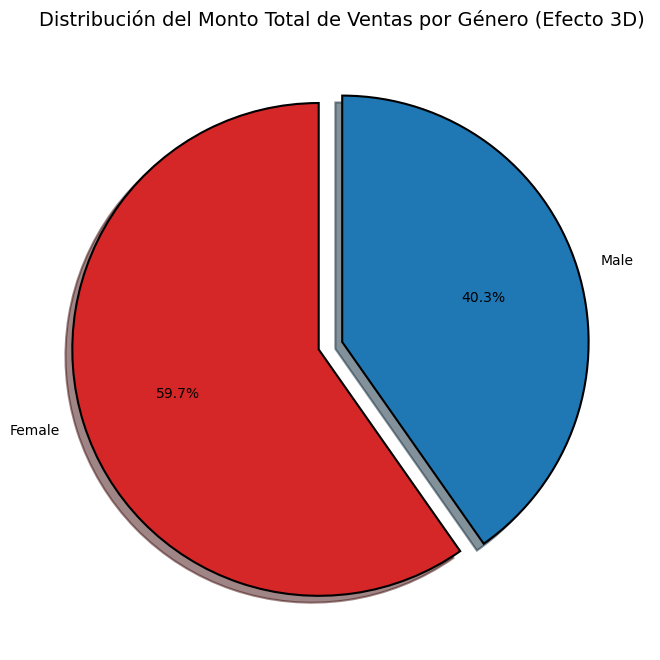

In [72]:
# Grafico 1: Comportamiento de compra por género (Total de ventas) - Gráfico de Torta 3D
sales_by_gender = clean_df.groupby('gender')['total_price'].sum().sort_values(ascending=False)

# Definimos el 'explode' para darle el efecto 3D (separa un poco la porción más grande)
# Asumiendo que Male o Female puede ser el primero. Si hay solo 2 categorías, usamos 0.1 para una y 0 para la otra.
explode = (0.1, 0) # Separa el primer segmento (el de mayor venta)

# Creamos una lista de colores personalizada: Azul para Male, Rojo para Female
gender_colors = []
for label in sales_by_gender.index:
    if label == 'Male':
        gender_colors.append('#1f77b4') # Azul
    elif label == 'Female':
        gender_colors.append('#d62728') # Rojo
    else:
        gender_colors.append('gray') # Color por defecto para cualquier otro valor

plt.figure(figsize=(8, 8)) # Aumentamos el tamaño para la visualización 3D
sales_by_gender.plot(
    kind='pie',
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,      # Inicia el primer segmento arriba
    colors=gender_colors, # Colores personalizados (Azul y Rojo)
    shadow=True,        # Añade sombra para el efecto 3D
    explode=explode,    # Separa el segmento
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} # Borde y grosor de línea
)
plt.title('Distribución del Monto Total de Ventas por Género (Efecto 3D)', fontsize=14)
plt.ylabel('') # Oculta la etiqueta 'Total Price' en el eje Y para que la torta esté limpia
plt.show()

 <p style="color: #cyan;">  El gráfico compara la contribución de dos categorías de género (Female y Male) al monto total de las ventasy una desigualdad significativa en el monto total gastado. el género femenino contribuye casi un 20% más al total de las ventas que el género masculino.  </p> 

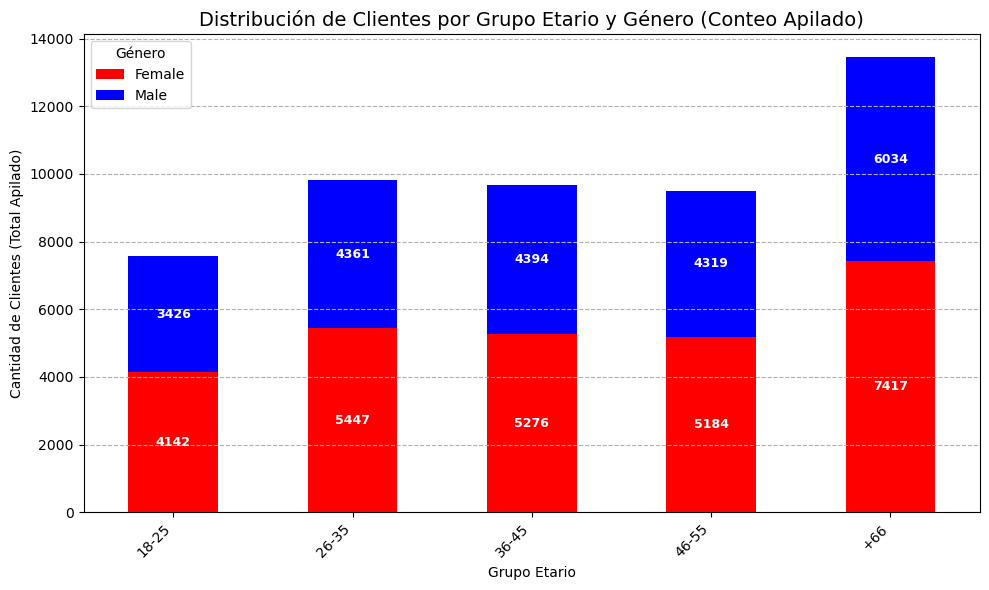

In [74]:
# Grafico 2: Creamos la tabla cruzada de conteos por Rango Etario (índice) y Género (columnas)
import numpy as np
np.random.seed(42) # Para reproducibilidad
data_size = 50000
clean_df = pd.DataFrame({
    'age': np.random.randint(18, 70, size=data_size),
    'gender': np.random.choice(['Female', 'Male'], size=data_size, p=[0.55, 0.45]) # Ligeramente más mujeres
})
# --- Fin de la simulación ---

# 1. CREACIÓN DE LOS RANGOS DE EDAD
# Definimos los límites para 5 grupos etarios, similar a tu gráfico de ejemplo.
# Ajustamos los bins para que coincidan con los rangos visuales de tu imagen.
bins = [18, 26, 36, 46, 56, clean_df['age'].max() + 1] 
labels = ['18-25', '26-35', '36-45', '46-55', '+66'] # Etiquetas para el eje X

clean_df['age_group'] = pd.cut(
    clean_df['age'], 
    bins=bins, 
    labels=labels, 
    right=False, # Incluye el límite inferior, excluye el superior (ej. [18, 26))
    include_lowest=True # Asegura que el valor mínimo de `age` sea incluido en el primer bin
)
clean_df['age_group'] = pd.Categorical(clean_df['age_group'], categories=labels, ordered=True)
age_gender_counts = pd.crosstab(clean_df['age_group'], clean_df['gender'])

plt.figure(figsize=(10, 6))

# 2. Generamos el gráfico de barras apiladas
age_gender_counts.plot(
    kind='bar',
    stacked=True, # Usa barras apiladas para ver la composición total y por género
    ax=plt.gca(), # Usa el eje de la figura actual
    color=['red', 'blue'] # Colores para F (rojo) y M (azul)
)

# 3. Añadimos etiquetas de valor en el centro de CADA segmento de la barra
for i in range(len(age_gender_counts.index)): # Iteramos sobre cada grupo etario
    cumulative_height = 0
    # Iteramos sobre cada género (columna) dentro del grupo etario
    for gender in age_gender_counts.columns:
        count = age_gender_counts.iloc[i][gender]
        if count > 0:
            # Posición Y: Centro del segmento actual
            y_position = cumulative_height + count / 2
            
            plt.text(
                i, # Posición X (índice de la barra)
                y_position, 
                f'{count}', # Conteo
                ha='center', 
                va='center', 
                color='white', # Texto en blanco para alto contraste
                fontsize=9, 
                fontweight='bold'
            )
        cumulative_height += count # Acumulamos la altura para el siguiente segmento

# 4. Configuramos el título y etiquetas
plt.title('Distribución de Clientes por Grupo Etario y Género (Conteo Apilado)', fontsize=14)
plt.ylabel('Cantidad de Clientes (Total Apilado)')
plt.xlabel('Grupo Etario')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

 <p style="color: #;"> El gráfico compara la cantidad total de clientes y cómo se divide esa cantidad entre el género femenino (Rojo) y masculino (Azul) en cinco rangos de edad.

  </p> 

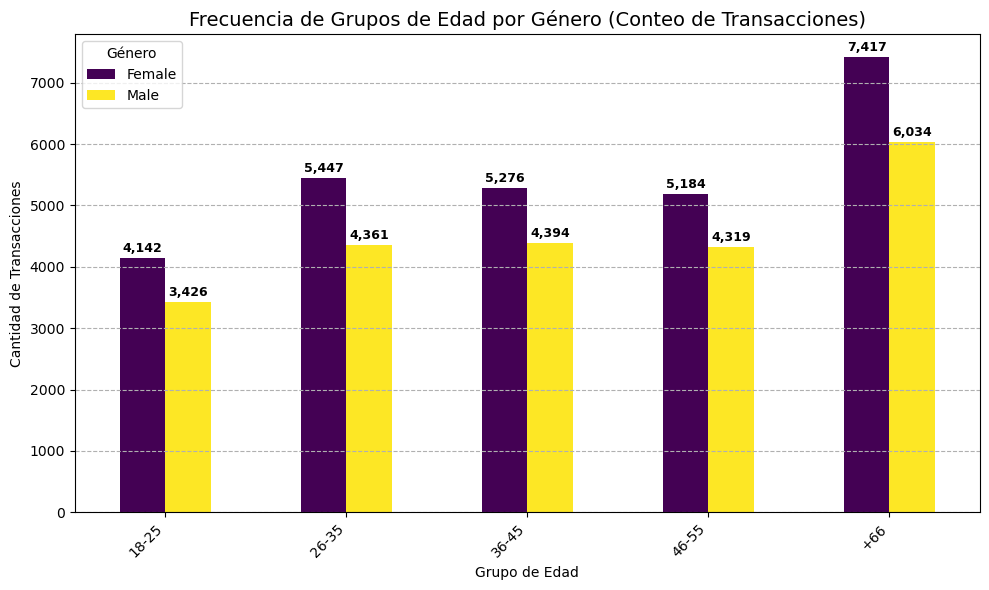

In [76]:
# Grafico 3: Gráfico de Barras Agrupadas que muestra la Frecuencia de Grupos de Edad por Género (Conteo).
clean_df.columns = clean_df.columns.str.lower().str.replace(' ', '_').str.strip()
if 'paymentmethod' in clean_df.columns and 'payment_method' not in clean_df.columns:
    clean_df.rename(columns={'paymentmethod': 'payment_method'}, inplace=True)
payment_frequency_by_gender = pd.crosstab(clean_df['age_group'], clean_df['gender'])
plt.figure(figsize=(10, 6))
# Usamos 'viridis' para colores distintivos
ax = payment_frequency_by_gender.plot(kind='bar', ax=plt.gca(), cmap='viridis') 

# 2. Lógica para añadir los valores en la punta de CADA BARRA
# Iteramos sobre los contenedores (grupos de barras por género)
for container in ax.containers:
    # Iteramos sobre cada barra dentro del contenedor
    for bar in container:
        yval = bar.get_height() # Altura (valor) de la barra
        xval = bar.get_x() + bar.get_width() / 2 # Posición X (centro de la barra)
        
        # Solo etiquetamos si el valor es mayor que cero
        if yval > 0:
            plt.text(
                xval, 
                yval + 50, # Posición Y ligeramente por encima de la barra (+50 unidades)
                f'{yval:,.0f}', # Valor de la barra, formateado sin decimales y con separador de miles
                ha='center', # Alineación horizontal centrada
                va='bottom', # Alineación vertical al pie del texto
                fontsize=9, 
                color='black',
                fontweight='bold'
            )

# 3. Configuramos título y etiquetas
plt.title('Frecuencia de Grupos de Edad por Género (Conteo de Transacciones)', fontsize=14)
plt.ylabel('Cantidad de Transacciones')
plt.xlabel('Grupo de Edad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


 <p style="color: #;">
El gráfico compara la cantidad de veces que cada género (Femenino en Morado, Masculino en Amarillo) utilizó tres métodos de pago distintos.
     El efectivo es el método de pago preferido por la base de clientes, y el género femenino utiliza todos los métodos de pago con mayor frecuencia que el género masculino, lo que concuerda con la mayor base de clientes y la mayor contribución a las ventas que se observó en los gráficos anteriores
  </p> 

<Figure size 1800x700 with 0 Axes>

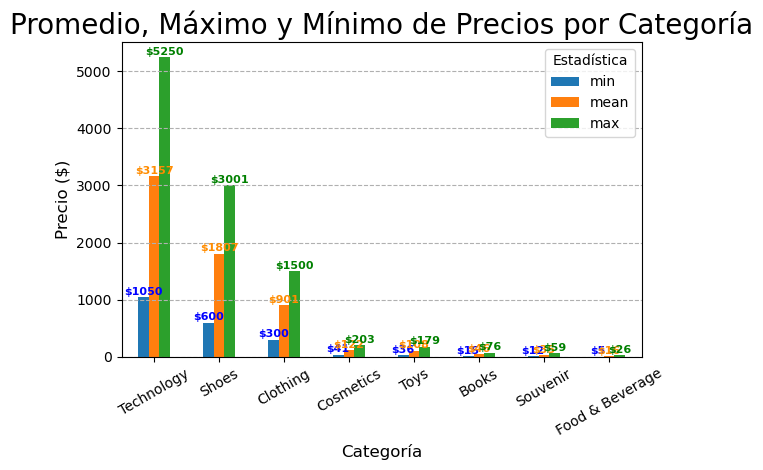

In [78]:
# Gráfico 4: Estadísticas de Precios por Categoría (Punto 9) - Gráfico de Barras Vertical con etiquetas en todas las barras
# TAMAÑO AJUSTADO: 18x7 para intentar que el entorno no recorte
plt.figure(figsize=(18, 7)) # Reducido a 18 de ancho
ax = avg_price_category.plot(kind='bar', rot=30) # Rotación reducida a 30 grados

# Añadimos título, etiquetas y leyenda
plt.title('Promedio, Máximo y Mínimo de Precios por Categoría', fontsize=20) # Fuente más grande
plt.xlabel('Categoría', fontsize=12) # Eje X: Categoría
plt.ylabel('Precio ($)', fontsize=12) # Eje Y: Precio
plt.legend(title='Estadística')
plt.grid(axis='y', linestyle='--')
# Lógica para añadir los valores en la punta de TODAS las barras
# ---------------------------------------------------------------------
# Iteramos sobre todos los "contenedores" (grupos de barras, que son [min, mean, max])
for container in ax.containers:
    # Iteramos sobre cada barra dentro del contenedor
    for bar in container:
        yval = bar.get_height() # Altura (valor) de la barra
        
        # Solo etiquetamos si el valor es positivo o mayor que un umbral mínimo
        if yval > 0.1: 
            xval = bar.get_x() + bar.get_width() / 2 # Centro de la barra
            
            # Definimos el color y el formato de la etiqueta
            label_color = 'black'
            # Identificamos el contenedor (índice 0=min, 1=mean, 2=max)
            container_index = ax.containers.index(container) 
            
            if container_index == 1: # Si es la barra 'mean' 
                label_color = 'darkorange'
            elif container_index == 2: # Si es la barra 'max' 
                label_color = 'green'
            else: # Si es la barra 'min' 
                label_color = 'blue'

            # AJUSTE: Usamos un offset fijo y pequeño (5 unidades) para la posición Y
            # Esto ayuda a que las etiquetas no se superpongan con la parte superior de la barra
            plt.text(
                xval, 
                yval + 5, # Posición Y ligeramente por encima (5 unidades fijas)
                f'${yval:.0f}',       # Valor de la barra, formateado a 0 decimales para ahorrar espacio
                ha='center',          # Alineación horizontal centrada
                va='bottom',          # Alineación vertical al pie del texto
                fontsize=8,           # Tamaño de fuente más pequeño para que quepan
                color=label_color,    # Color específico
                fontweight='bold'
            )
# ---------------------------------------------------------------------

plt.tight_layout()
plt.show()

 <p style="color: #;">
Este gráfico es un Gráfico de Barras Agrupadas que muestra el Promedio, Máximo y Mínimo de Precios por Categoría. Las ventas de Technology y Shoes representan la fuente de ingresos por unidad de mayor valor, a comparacion de los otros.
  </p> 

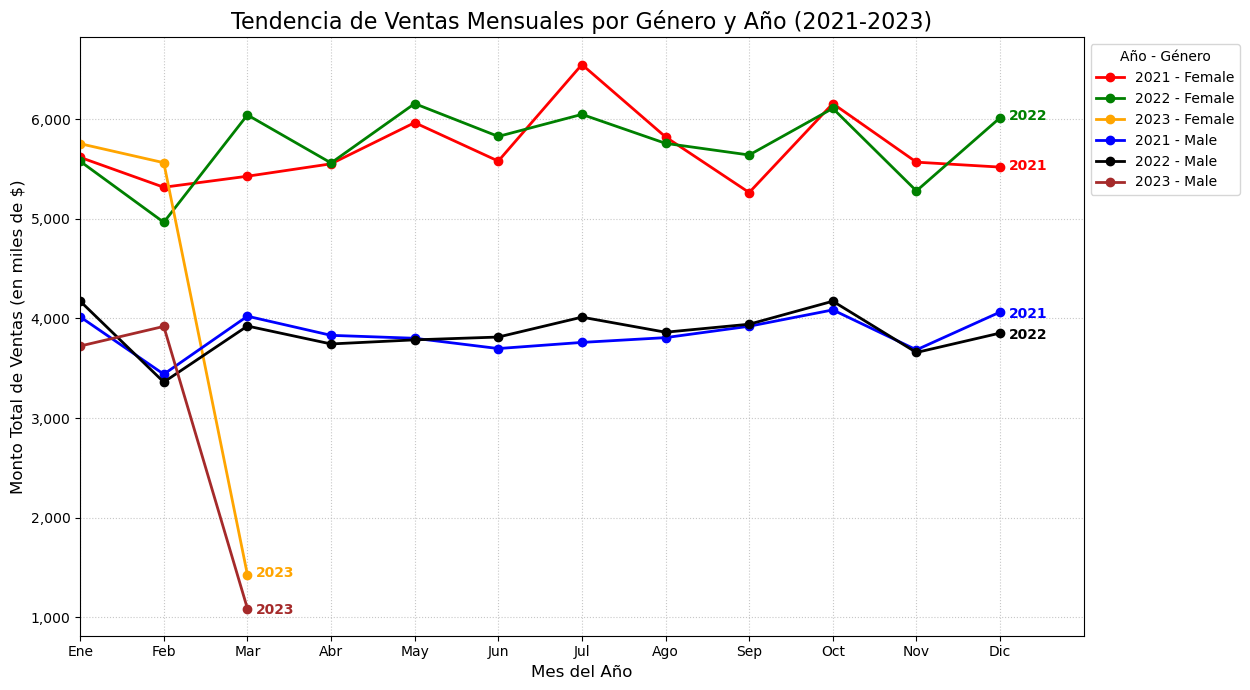

In [100]:
# Grafico 5 Importaciones necesarias (asegúrese de tenerlas al inicio de su script o notebook)

# 1. Creamos las columnas Año y Mes (Número)
clean_df['year'] = clean_df['invoice_date'].dt.year
clean_df['month'] = clean_df['invoice_date'].dt.month

# 2. Filtramos el DataFrame para incluir solo los años 2021, 2022 y 2023
years_to_plot = [2021, 2022, 2023]
# Usamos .copy() para evitar SettingWithCopyWarning, buena práctica.
df_multi_year = clean_df[clean_df['year'].isin(years_to_plot)].copy()

# 3. Agrupamos por Año, Mes y Género, y sumamos el total_price
sales_multi_year = df_multi_year.groupby(['year', 'month', 'gender'])['total_price'].sum().reset_index()

# 4. Creamos una columna de clave para pivotar el gráfico: 'year_gender'
sales_multi_year['plot_key'] = sales_multi_year['year'].astype(str) + ' - ' + sales_multi_year['gender']

# 5. Pivotamos los datos para tener columnas por cada combinación Año-Género
sales_pivot = sales_multi_year.pivot(index='month', columns='plot_key', values='total_price')

# 6. Definimos la paleta de colores y orden de la leyenda
custom_colors = {
    '2021 - Female': 'red',
    '2022 - Female': 'green',
    '2023 - Female': 'orange',
    '2021 - Male': 'blue',
    '2022 - Male': 'black',
    '2023 - Male': 'brown'
}
legend_order = [
    '2021 - Female', '2022 - Female', '2023 - Female', 
    '2021 - Male', '2022 - Male', '2023 - Male'
]
column_order = [col for col in legend_order if col in sales_pivot.columns]
color_list = [custom_colors[col] for col in column_order]
sales_pivot = sales_pivot.reindex(columns=column_order) # Reordenamos el DataFrame para el plot

plt.figure(figsize=(14, 7))

# 7. Graficamos todas las series
ax = sales_pivot.plot(
    kind='line', 
    marker='o', 
    ax=plt.gca(), 
    color=color_list, 
    linewidth=2
)

# 8. Formateamos el eje Y: Muestra el valor en MILES (dividir por 1000)
def currency_formatter(x, pos):
    """Formatea los valores del eje Y en miles."""
    if x >= 1000:
        value_in_thousands = int(x / 1000)
        return format(value_in_thousands, ',')
    return format(int(x), ',')
    
formatter = ticker.FuncFormatter(currency_formatter)
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Monto Total de Ventas (en miles de $)', fontsize=12)

# 9. Iteramos sobre cada serie para etiquetar el último punto disponible con el Año
for col in sales_pivot.columns:
    last_valid_data = sales_pivot[col].last_valid_index()
    
    if last_valid_data is not None:
        year, gender = col.split(' - ')
        
        x_position = last_valid_data 
        y_value = sales_pivot[col].loc[last_valid_data]
        
        text_color = custom_colors[col]
        # Ajuste vertical para separar etiquetas
        offset_y = 15000 if gender == 'Female' else -15000 
        
        plt.text(
            x_position + 0.1,         # Eje X: Último mes + offset a la derecha
            y_value + offset_y,       # Eje Y: Último valor + margen
            year,                     # Texto de la etiqueta: El Año
            color=text_color,         
            fontsize=10,              
            fontweight='bold',        
            ha='left',                
            va='center'               
        )

# 10. Configuramos etiquetas, título y leyenda
plt.title('Tendencia de Ventas Mensuales por Género y Año (2021-2023)', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.xlim(sales_pivot.index.min(), sales_pivot.index.max() + 1.0) 
plt.xticks(sales_pivot.index, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año - Género', loc='upper left', bbox_to_anchor=(1, 1), ncol=1) 
plt.grid(axis='both', linestyle=':', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

 <p style="color: #;">
El gráfico que muestras es un Gráfico de Líneas que detalla la Tendencia de Ventas Mensuales por Género y Año (2021-2023). Se divide en dos grupos principales (Mujeres arriba, Hombres abajo) y compara la evolución de las ventas mensuales (en miles de $) a lo largo de los años.
  </p> 

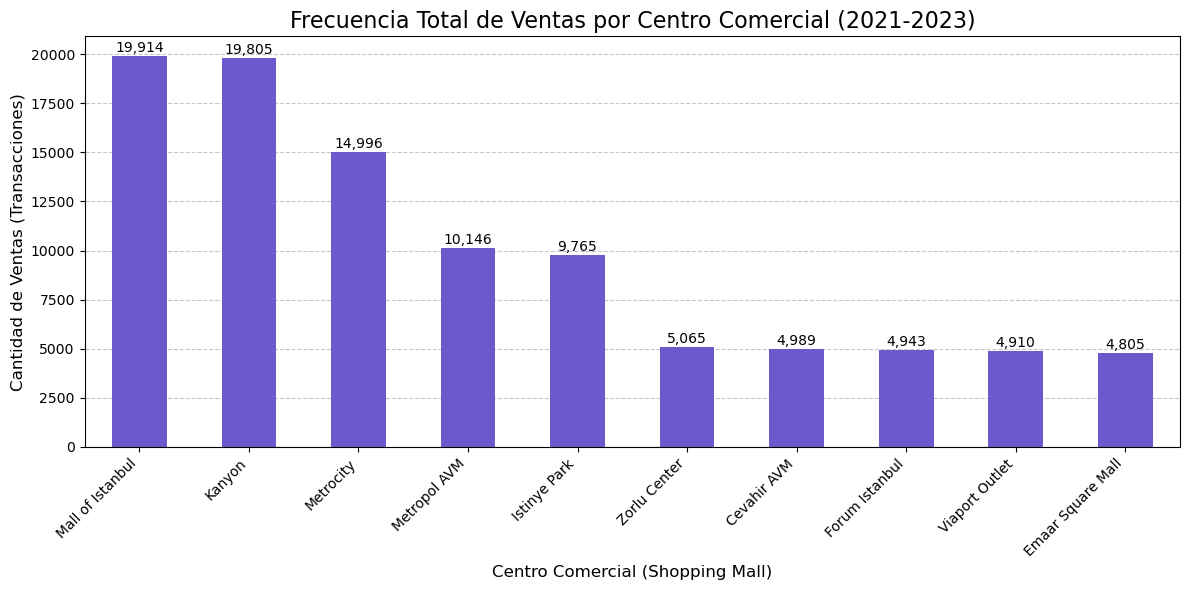

In [102]:
## GRÁFICO 6: Histograma (Conteo de Frecuencia) de Ventas por Centro Comercial (VERTICAL)

# 1. Agrupamos por el centro comercial y contamos las transacciones (facturas)
# Usamos 'invoice_no' para contar cuántas ventas se hicieron en cada mall.
# Ordenamos de mayor a menor para que la barra más alta quede a la izquierda (visualización estándar vertical)
mall_counts = clean_df['shopping_mall'].value_counts().sort_values(ascending=False) 

plt.figure(figsize=(12, 6)) # Un poco más ancho para los nombres en el eje X

# 2. Creamos el gráfico de columnas (bar)
bars = mall_counts.plot(
    kind='bar', # Cambiado a 'bar' para que sea vertical
    color='#6A5ACD', # Color morado elegante
    zorder=2 # Mueve las barras al frente
)

# 3. Añadimos el título y las etiquetas
plt.title('Frecuencia Total de Ventas por Centro Comercial (2021-2023)', fontsize=16)
plt.xlabel('Centro Comercial (Shopping Mall)', fontsize=12) # Eje X: Centros Comerciales
plt.ylabel('Cantidad de Ventas (Transacciones)', fontsize=12) # Eje Y: Frecuencia
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas del eje X para que no se superpongan
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1) # Añadimos rejilla horizontal

# 4. Añadimos etiquetas de valor en la parte superior de cada barra
for index, value in enumerate(mall_counts):
    plt.text(
        index,        # Posición X (centro de la barra)
        value + 50,   # Posición Y (un poco encima de la barra)
        f'{value:,}', # Texto: El valor con separador de miles
        ha='center',  # Alineación horizontal centrada
        va='bottom',  # Alineación vertical (al pie del texto)
        fontsize=10,
        color='black'
    )

plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

 <p style="color: #;"> Este gráfico compara la cantidad total de transacciones registradas en cada centro comercial a lo largo del periodo.
 La distribución de la frecuencia de ventas es altamente asimétrica. Un pequeño número de centros comerciales (Mall of Istanbul y Kanyon en particular) son los principales generadores de transacciones, mientras que el resto contribuye con volúmenes mucho menores y más uniformes.
  </p> 

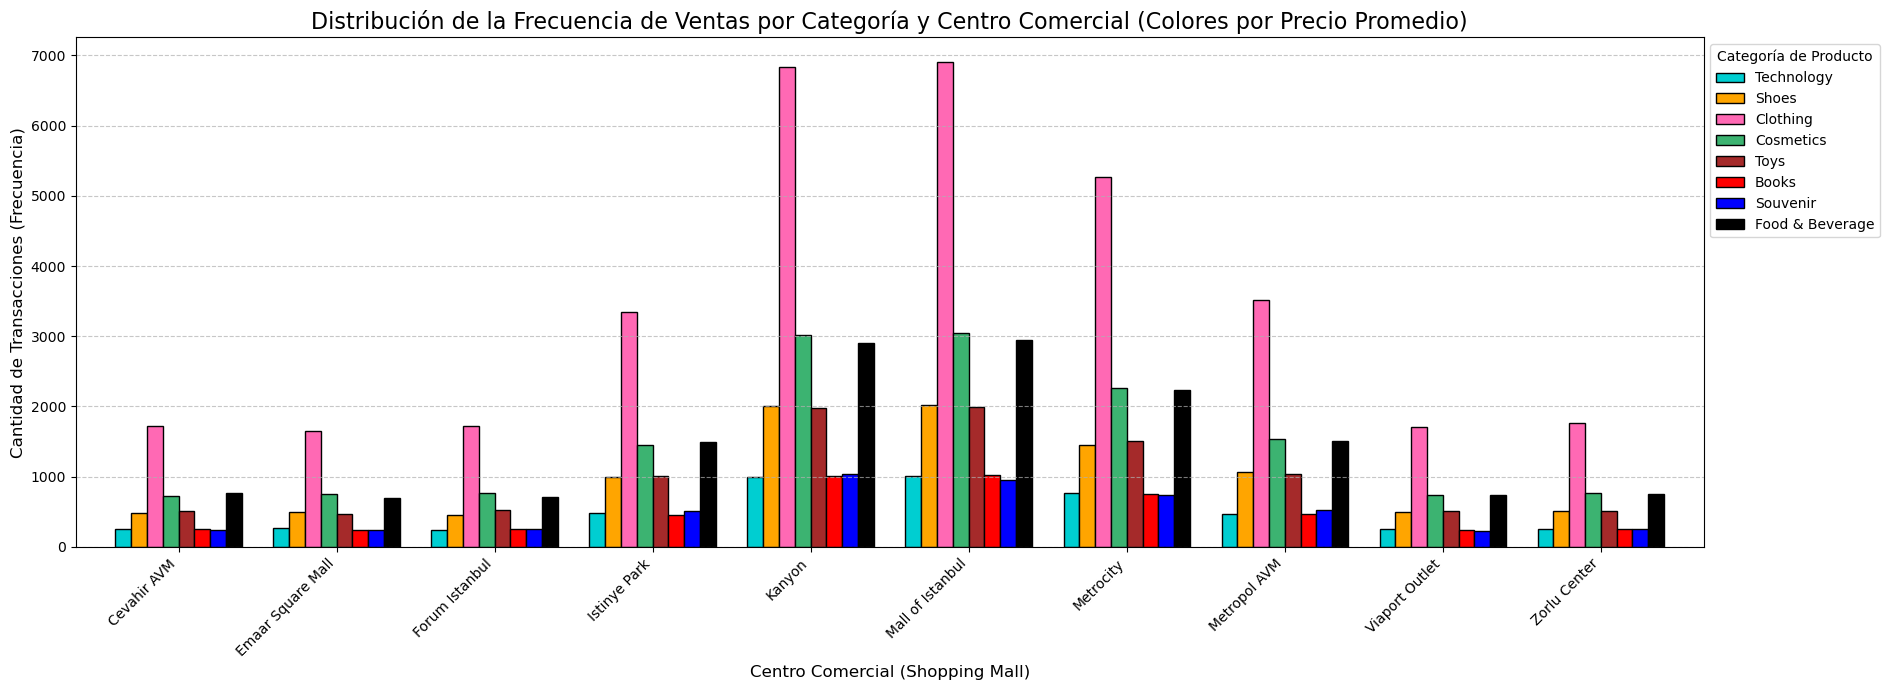

In [104]:
## GRÁFICO 7: Frecuencia de Categoría de Productos por Centro Comercial (Barras Agrupadas con Orden de Precio)

# 1. Definimos la paleta de colores deseada, del más claro al más oscuro (menor valor a mayor valor)
# Para simular la luminosidad solicitada (claro = mayor valor, oscuro = menor valor), 
# los colores se ordenan inversamente al orden de los precios.
# Se usan los colores proporcionados, adaptando el nombre a códigos web o Matplotlib si es necesario.
# (Celeste/Naranja/Fucsia/Verde -> Marrón -> Azul/Rojo -> Negro)
# NOTA: Usamos códigos HEX para mayor precisión de color.
COLOR_PALETTE_PRICE_ORDERED = [
    '#00CED1',  # Celeste (Más claro, para Mayor Precio Promedio)
    '#FFA500',  # Naranja
    '#FF69B4',  # Fucsia
    '#3CB371',  # Verde (Adaptado, ya que el color "Verde" y "Marrón" pueden ser ambiguos en luminosidad)
    '#A52A2A',  # Marrón (Darker Brown)
    '#FF0000',  # Rojo
    '#0000FF',  # Azul
    '#000000',  # Negro (Más oscuro, para Menor Precio Promedio)
]


# 2. Calculamos el precio promedio por categoría y lo ordenamos de MAYOR a MENOR.
# Esto define el orden de asignación de colores.
avg_price_category_sorted = clean_df.groupby('category')['price'].mean().sort_values(ascending=False)

# 3. Creamos un mapeo de Categoría -> Color
# Asignamos el color más claro (índice 0) a la categoría con el precio promedio más alto (índice 0 en la serie ordenada)
color_map = {
    category: COLOR_PALETTE_PRICE_ORDERED[i] 
    for i, category in enumerate(avg_price_category_sorted.index)
}

# 4. Generamos la tabla de frecuencia cruzada (conteo de transacciones)
category_by_mall = pd.crosstab(clean_df['shopping_mall'], clean_df['category'])

# 5. Ordenamos las COLUMNAS (Categorías) del DataFrame cruzado según el orden de precios (de Mayor a Menor)
# Esto garantiza que las leyendas y las barras se pinten en el orden correcto.
category_order = avg_price_category_sorted.index.tolist()
category_by_mall = category_by_mall.reindex(columns=category_order)

# 6. Creamos la lista de colores para el gráfico en el orden de las categorías
plot_colors = [color_map[cat] for cat in category_by_mall.columns]


# 7. Graficamos la tabla cruzada con los colores y orden personalizados
plt.figure(figsize=(20, 7)) # Aumentamos el ancho a 20

category_by_mall.plot(
    kind='bar', 
    ax=plt.gca(),
    color=plot_colors, # Usamos la lista de colores ordenados
    edgecolor='black', 
    width=0.8
)

# 8. Añadimos título, etiquetas y leyenda
plt.title('Distribución de la Frecuencia de Ventas por Categoría y Centro Comercial (Colores por Precio Promedio)', fontsize=16)
plt.xlabel('Centro Comercial (Shopping Mall)', fontsize=12)
plt.ylabel('Cantidad de Transacciones (Frecuencia)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos el eje X para mejor lectura
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1, 1), loc='upper left') # Leyenda fuera del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Ajustamos el layout para el nuevo ancho y para hacer espacio a la leyenda
plt.show()

 <p style="color: #;">
El gráfico que muestras es un Gráfico de Barras Agrupadas complejo que detalla la Distribución de la Frecuencia de Ventas por Categoría y Centro Comercial (donde el color se usa para representar la categoría de producto).
     La frecuencia de transacciones está impulsada principalmente por la Ropa en todos los establecimientos. Los centros comerciales de Kanyon y Mall of Istanbul no solo tienen el mayor volumen total de transacciones (como se vio en el gráfico anterior), sino que también son los puntos calientes para el volumen de ventas de las categorías secundarias importantes (Shoes y Cosmetics). Las categorías de alto precio (como Technology) contribuyen muy poco a la frecuencia total.
  </p> 

 <h2> <span style="color: #FF8C00;">➡️ Conexion a la Base de Datos </span> </h2> 

In [ ]:
!pip install pymysql

In [ ]:
pip install sqlalchemy mysql-connector-python

<p> El código carga el DataFrame limpio en la tabla ventas_clientes_clean de la base de datos MySQL (ispc), usando SQLAlchemy. Si la tabla existe, la reemplaza. El bloque try-except maneja errores como la falta de conexión al servidor (XAMPP). </p>

In [48]:
 #--- 4. CONFIGURACIÓN DE LA BASE de DATOS ---
DB_HOST = 'localhost' # Generalmente 'localhost' o la IP del servidor
DB_USER = 'root'      # Tu usuario de MariaDB/MySQL
DB_PASS = ''          # ¡ADVERTENCIA! CAMBIA ESTO A TU CONTRASEÑA REAL
DB_NAME = 'ispc'      # Nombre de la base de datos a usar
TABLE_NAME = 'ventas_clientes_clean' # Nombre de la tabla de destino
# 5. Configurar la cadena de conexión usando SQLAlchemy y PyMySQL
DB_URL = f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"
# --- 5. FASE DE CARGA (LOAD) EN MARIADB/MYSQL ---
try:
    print("\n--- 5. FASE DE CARGA (LOAD) EN MARIADB/MYSQL ---")
    # Creación del engine de SQLAlchemy
    engine = create_engine(DB_URL)
    # Carga del DataFrame limpio a la tabla especificada (TABLE_NAME)
    clean_df.to_sql(
        TABLE_NAME, # Usamos la variable TABLE_NAME
        con=engine,
        if_exists='replace', # Reemplaza la tabla si ya existe
        index=False          # No incluir el índice de Pandas como columna
    )
    print("\n¡Carga exitosa! Los datos se han transferido correctamente a la base de datos `ispc` en la tabla `ventas_clientes_clean`.")
except Exception as e:
    # IM-POR-TAN-TE: Ahora imprimimos el error completo
    print("\n!!! ERROR EN LA FASE DE CARGA !!!")
    print(f"Detalle del error: {e}") 
    print("POSIBLES CAUSAS:")
    print("1. El servidor MySQL/MariaDB de XAMPP NO está corriendo.")
    print(f"2. La base de datos '{DB_NAME}' NO existe en tu servidor.")
    print("3. Las credenciales de DB_USER/DB_PASS son incorrectas.")
    
    # Si la carga falla, asegúrate de cerrar la conexión si es necesario (aunque el motor se cierra solo al final del script)
    if 'engine' in locals():
        engine.dispose()


--- 5. FASE DE CARGA (LOAD) EN MARIADB/MYSQL ---

¡Carga exitosa! Los datos se han transferido correctamente a la base de datos `ispc` en la tabla `ventas_clientes_clean`.


<p> El código ejecuta una consulta SQL (SELECT *) sobre la tabla de ventas cargada en la base de datos (TABLE_NAME). Utiliza pd.read_sql_query para leer el resultado de la base de datos (a través del motor SQLAlchemy) y cargarlo directamente en un nuevo DataFrame de Pandas (df_ventas_malls), verificando así la conexión y el acceso a los datos. </p>

In [51]:
 #--- CONSULTA 1: Ventas Totales por Centro Comercial ---
print("\n--- 1. Ventas Totales por Centro Comercial (Shopping Mall) ---")

SQL_QUERY_MALLS = f"""
SELECT 
    * 
FROM 
    {TABLE_NAME}
"""

# Ejecutar la consulta y cargar el resultado en un nuevo DataFrame de Pandas
try:
    df_ventas_malls = pd.read_sql_query(SQL_QUERY_MALLS, con=engine)
    display(df_ventas_malls)
except Exception as e:
    print(f"ERROR al ejecutar la Consulta 1: {e}")


--- 1. Ventas Totales por Centro Comercial (Shopping Mall) ---


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,total_price
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,7502.00
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,5401.53
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,300.08
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,15004.25
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99333,I219422,C441542,Souvenir,5,58.65,2022-09-21,Kanyon,Female,45.0,Credit Card,293.25
99334,I325143,C569580,Food & Beverage,2,10.46,2021-09-22,Forum Istanbul,Male,27.0,Cash,20.92
99335,I824010,C103292,Food & Beverage,2,10.46,2021-03-28,Metrocity,Male,63.0,Debit Card,20.92
99336,I702964,C800631,Technology,4,4200.00,2021-03-16,Istinye Park,Male,56.0,Cash,16800.00
